# Integrated Management of Public Distribution System
The impds_dec_2024.csv dataset contains structured data on inter-state transactions across Indian states. It records the flow of transactions from one state (referred to as the Home State) to another (referred to as the Sale State) on a monthly and yearly basis. This data is likely used for analyzing trade or service movement patterns across states.

Structure and Attributes:
homestatecode (Integer)
Represents the unique numerical code assigned to the home state (source of the transaction).

salestatecode (Integer)
Represents the unique numerical code assigned to the sale state (destination of the transaction).

month (Integer)
Denotes the month (1 to 12) during which the transaction occurred.

year (Integer)
Indicates the year in which the transaction took place.

transactions (Integer)
Specifies the total number of transactions that occurred between the specified home state and sale state during the given month and year.

salestatename (String)
The official name of the sale state, corresponding to the salestatecode.

homestatename (String)
The official name of the home state, corresponding to the homestatecode.

Dataset Size:
Total Records (Rows): 351
Total Attributes (Columns): 7
Use Case Applications:
Analysis of inter-state transaction trends.
Studying trade patterns and economic activity across Indian states.
Identifying transaction hotspots or high-flow corridors.
Temporal (monthly/yearly) trend analysis of transactions.
State-level policy and planning support using transaction data.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Importing dataset#

In [3]:
df = pd.read_csv('impds_dec_2024.csv')
df

,homestatecode,salestatecode,month,year,txn_count,salestatename,homestatename
0,5,1,12,2024,13,JAMMU AND KASHMIR,UTTARAKHAND
1,6,1,12,2024,28,JAMMU AND KASHMIR,HARYANA
2,7,1,12,2024,7,JAMMU AND KASHMIR,DELHI
3,8,1,12,2024,8,JAMMU AND KASHMIR,RAJASTHAN
4,9,1,12,2024,2196,JAMMU AND KASHMIR,UTTAR PRADESH
...,...,...,...,...,...,...,...
346,23,38,12,2024,888,Dadar & Nagar Haveli & Daman & Diu,MADHYA PRADESH
347,24,38,12,2024,1033,Dadar & Nagar Haveli & Daman & Diu,GUJARAT
348,29,38,12,2024,2,Dadar & Nagar Haveli & Daman & Diu,KARNATAKA
349,32,38,12,2024,2,Dadar & Nagar Haveli & Daman & Diu,KERALA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   homestatecode  351 non-null    int64 
 1   salestatecode  351 non-null    int64 
 2   month          351 non-null    int64 
 3   year           351 non-null    int64 
 4   txn_count      351 non-null    int64 
 5   salestatename  351 non-null    object
 6   homestatename  351 non-null    object
dtypes: int64(5), object(2)
memory usage: 19.3+ KB


In [5]:
df.head()

,homestatecode,salestatecode,month,year,txn_count,salestatename,homestatename
0,5,1,12,2024,13,JAMMU AND KASHMIR,UTTARAKHAND
1,6,1,12,2024,28,JAMMU AND KASHMIR,HARYANA
2,7,1,12,2024,7,JAMMU AND KASHMIR,DELHI
3,8,1,12,2024,8,JAMMU AND KASHMIR,RAJASTHAN
4,9,1,12,2024,2196,JAMMU AND KASHMIR,UTTAR PRADESH


# Finding null values


In [6]:
df.isnull().sum()

homestatecode    0
salestatecode    0
month            0
year             0
txn_count        0
salestatename    0
homestatename    0
dtype: int64

# Finding Duplicates

In [7]:
df.duplicated().sum()

0

# Renaming txn_count to transactions

In [8]:
df.columns = df.columns.str.strip().str.lower().str.replace('txn_count', 'transactions')
df

,homestatecode,salestatecode,month,year,transactions,salestatename,homestatename
0,5,1,12,2024,13,JAMMU AND KASHMIR,UTTARAKHAND
1,6,1,12,2024,28,JAMMU AND KASHMIR,HARYANA
2,7,1,12,2024,7,JAMMU AND KASHMIR,DELHI
3,8,1,12,2024,8,JAMMU AND KASHMIR,RAJASTHAN
4,9,1,12,2024,2196,JAMMU AND KASHMIR,UTTAR PRADESH
...,...,...,...,...,...,...,...
346,23,38,12,2024,888,Dadar & Nagar Haveli & Daman & Diu,MADHYA PRADESH
347,24,38,12,2024,1033,Dadar & Nagar Haveli & Daman & Diu,GUJARAT
348,29,38,12,2024,2,Dadar & Nagar Haveli & Daman & Diu,KARNATAKA
349,32,38,12,2024,2,Dadar & Nagar Haveli & Daman & Diu,KERALA


# Summary

In [9]:
df.describe(include='all')

,homestatecode,salestatecode,month,year,transactions,salestatename,homestatename
count,351.000000,351.000000,351.0,351.0,351.000000,351,351
unique,NaN,NaN,NaN,NaN,NaN,28,21
top,NaN,NaN,NaN,NaN,NaN,MAHARASHTRA,BIHAR
freq,NaN,NaN,NaN,NaN,NaN,20,27
mean,17.000000,18.581197,12.0,2024.0,2314.772080,NaN,NaN
std,10.201961,11.854768,0.0,0.0,16910.829673,NaN,NaN
min,1.000000,1.000000,12.0,2024.0,1.000000,NaN,NaN
25%,8.000000,7.000000,12.0,2024.0,4.000000,NaN,NaN
50%,18.000000,19.000000,12.0,2024.0,20.000000,NaN,NaN
75%,24.000000,29.000000,12.0,2024.0,254.000000,NaN,NaN


# Data Visualizations

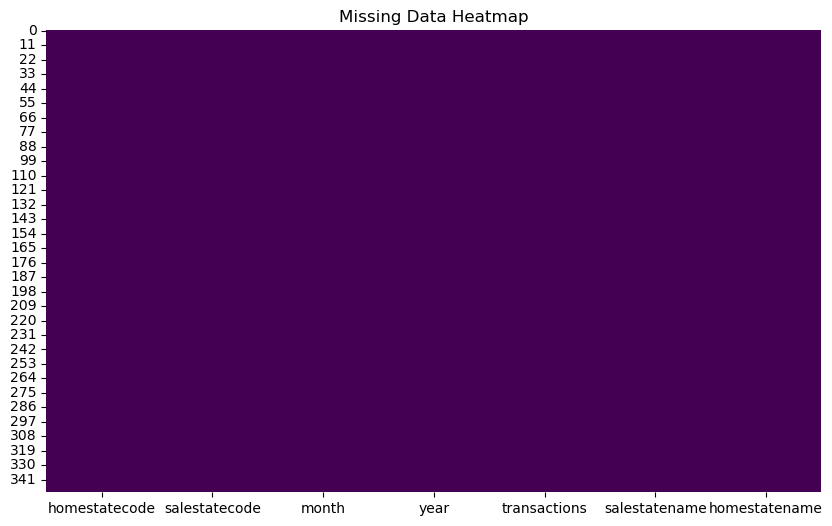

In [10]:
# Heatmap of missing data
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Histograms for numeric columns

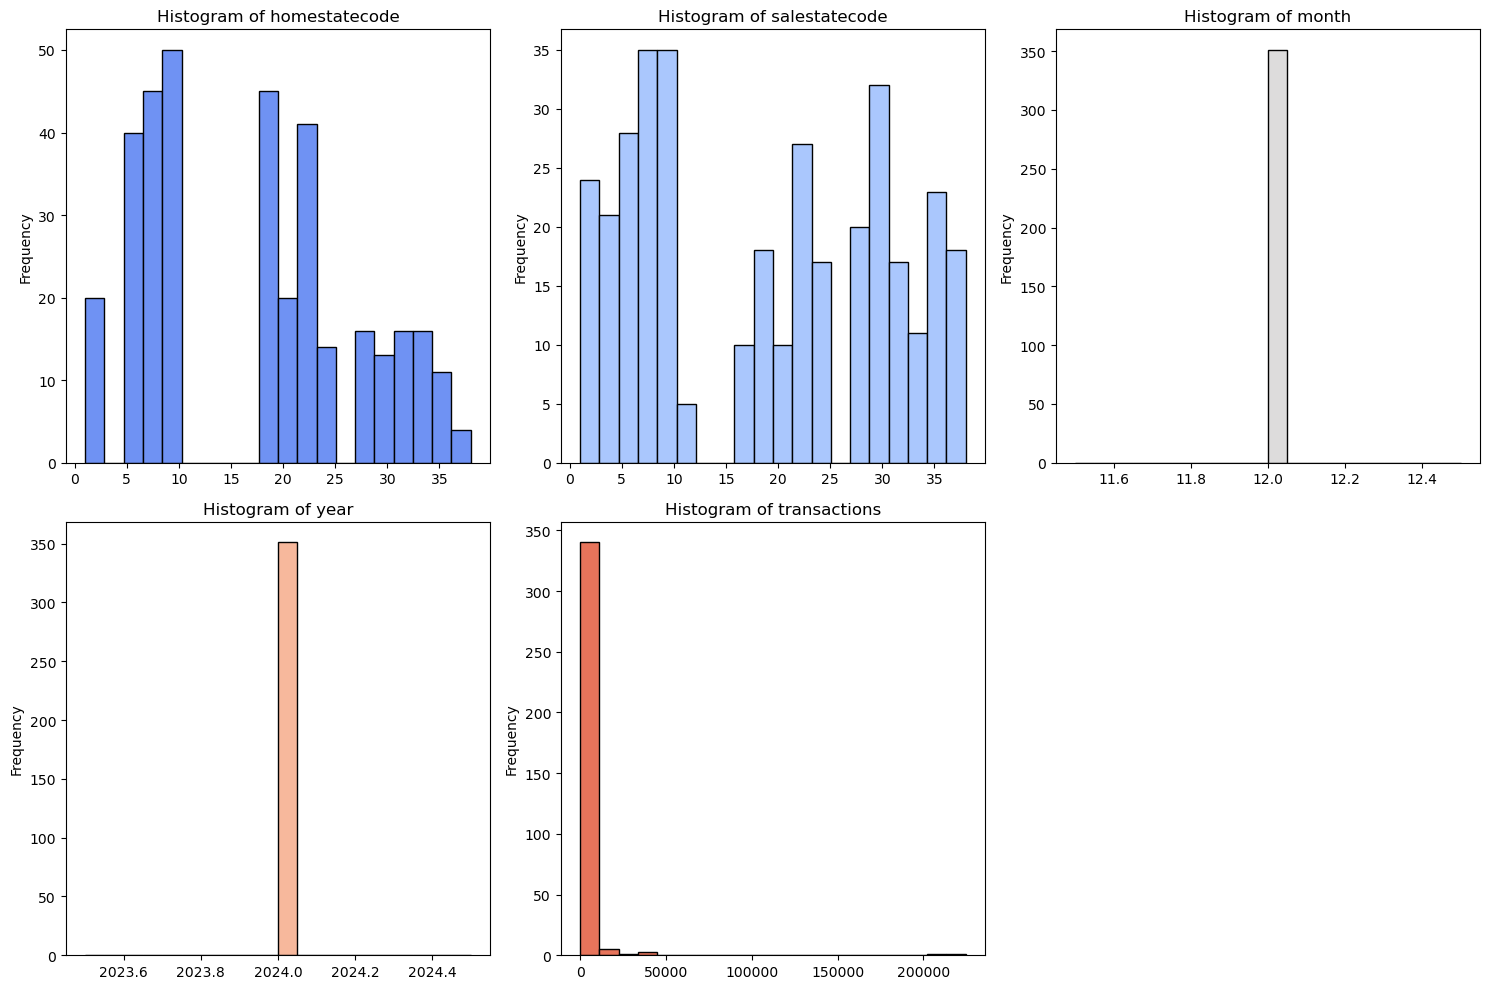

In [22]:
num_cols = df.select_dtypes(include='number').columns
colors = sns.color_palette("coolwarm", len(num_cols))
fig, axes = plt.subplots(nrows=int(len(num_cols) / 3) + 1, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    df[col].plot(kind='hist', bins=20, ax=axes[i], color=colors[i], edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Correlation heatmap

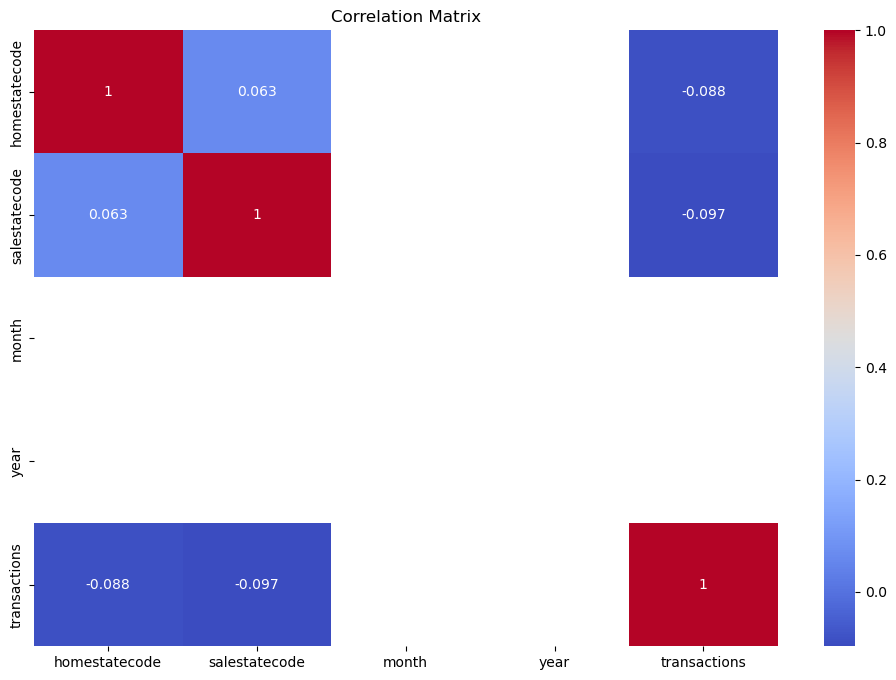

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Count plots for categorical columns

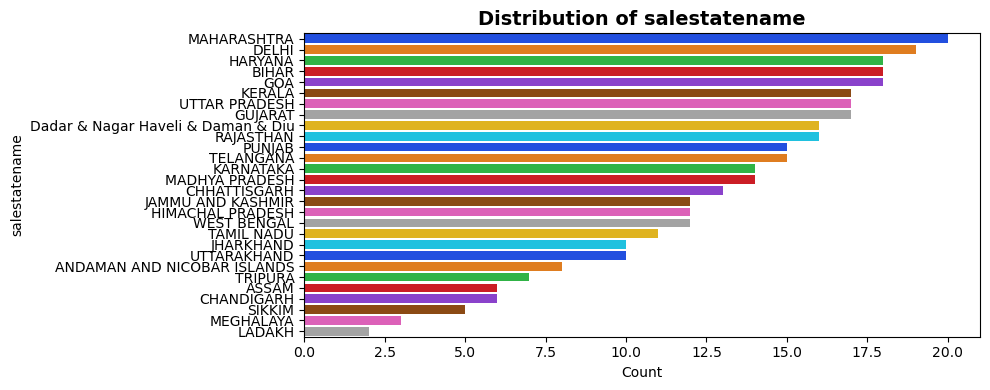

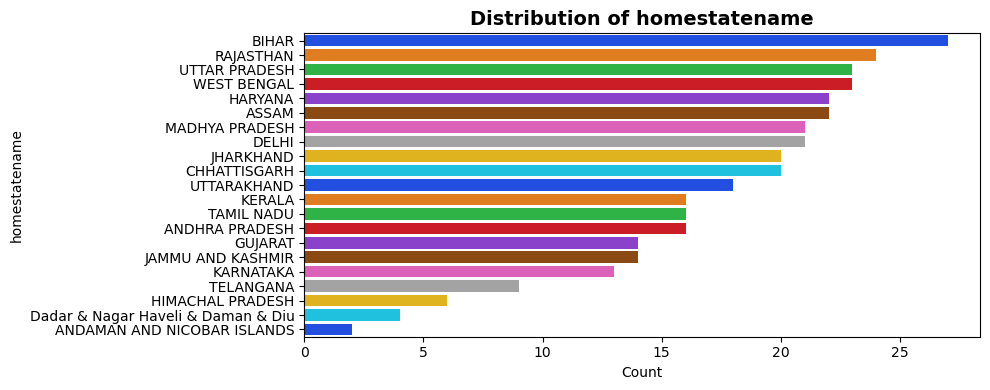

In [20]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='bright')
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


# Boxplots for numeric columns

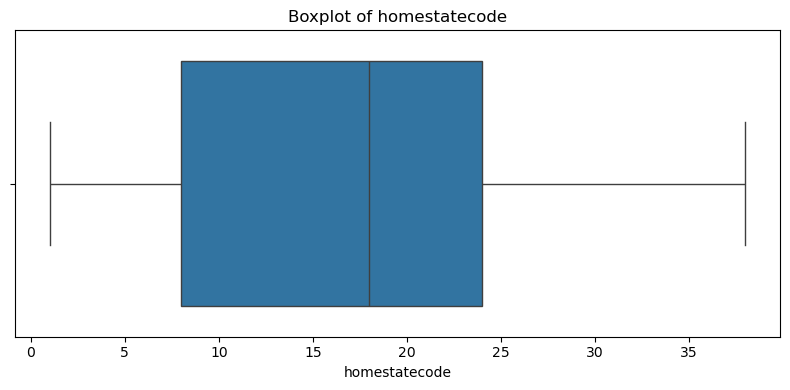

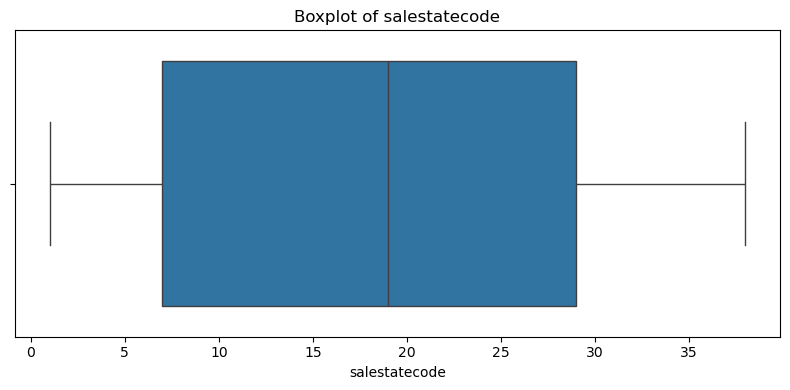

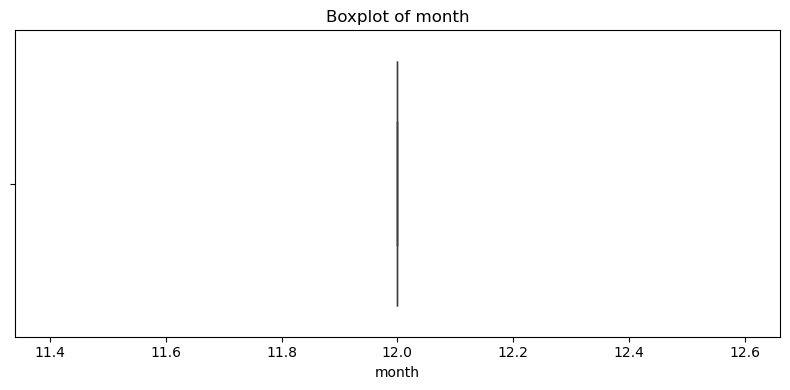

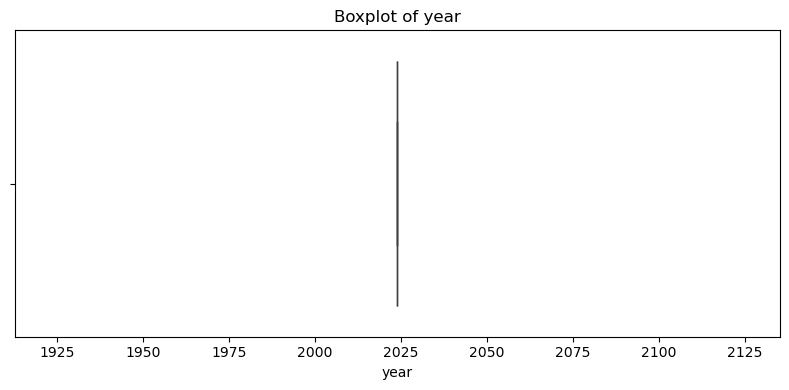

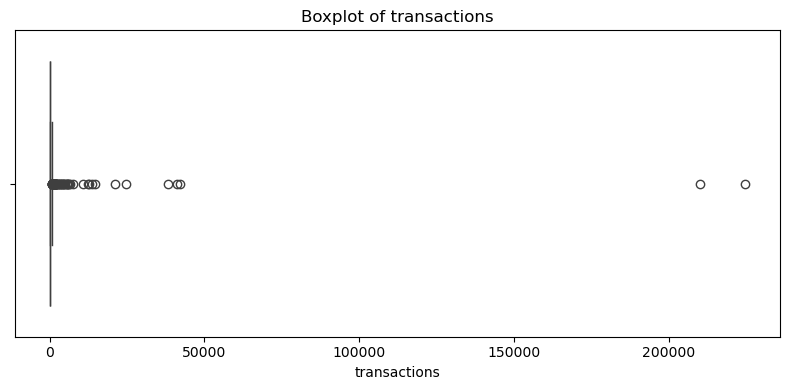

In [14]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# Plot pairwise relationships

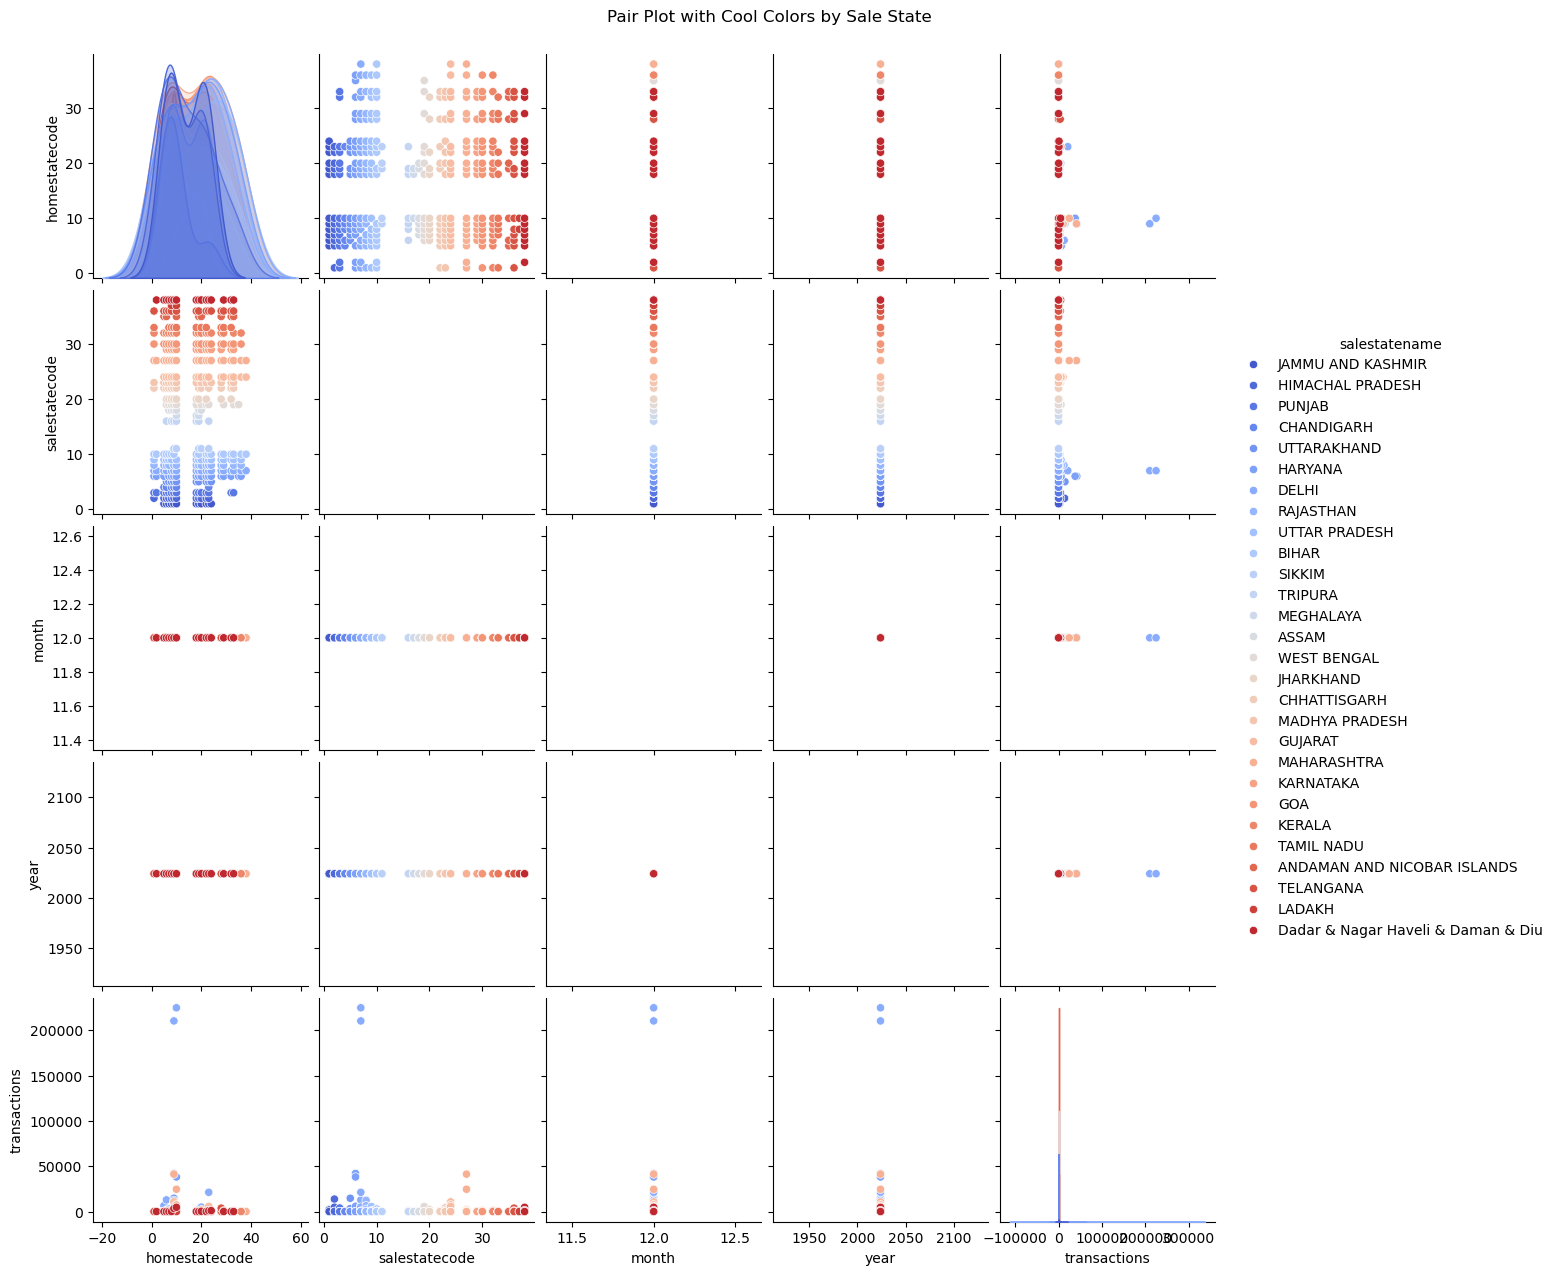

In [23]:
sns.pairplot(df[numeric_cols.tolist() + ['salestatename']], 
             hue='salestatename', 
             palette='coolwarm')
plt.suptitle('Pair Plot with Cool Colors by Sale State', y=1.02)
plt.show()

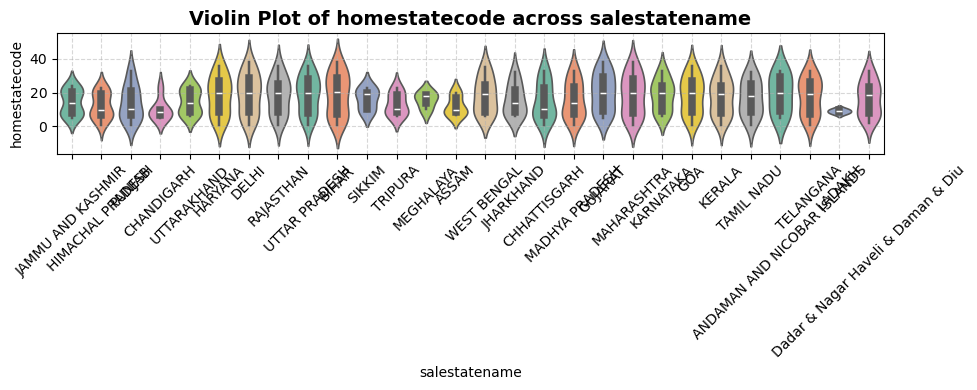

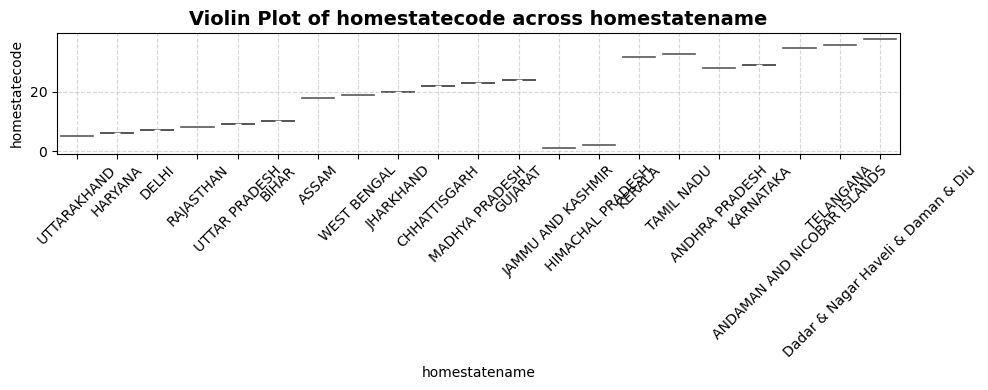

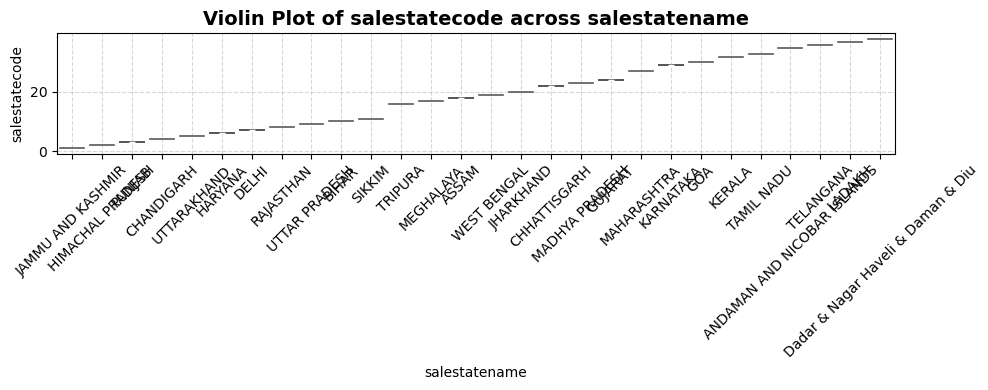

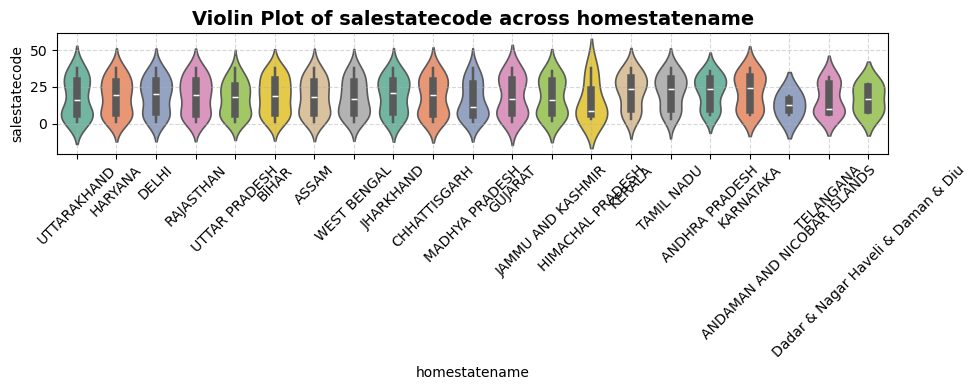

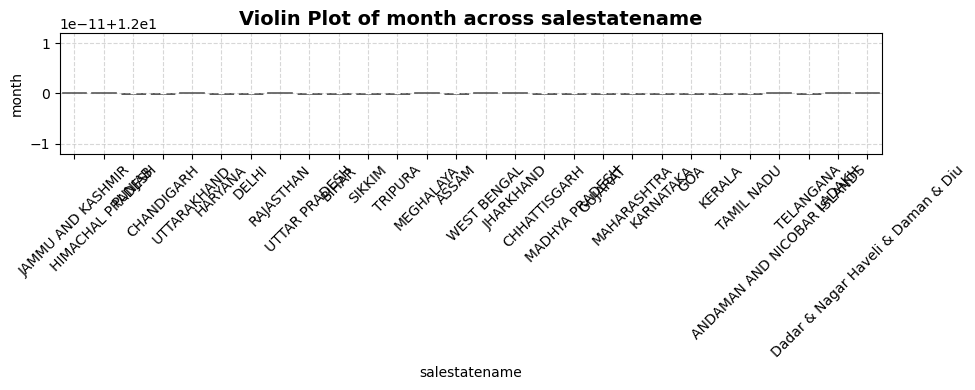

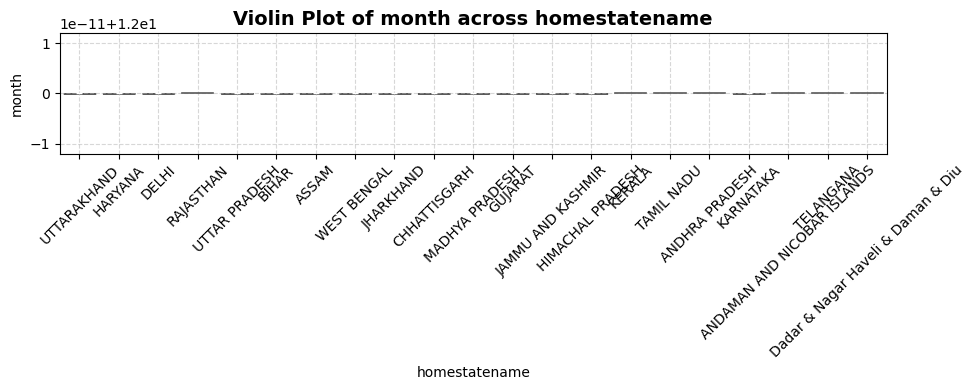

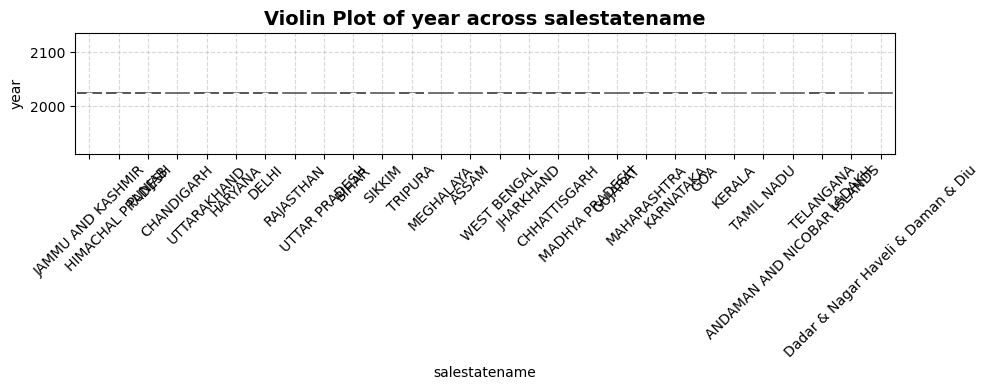

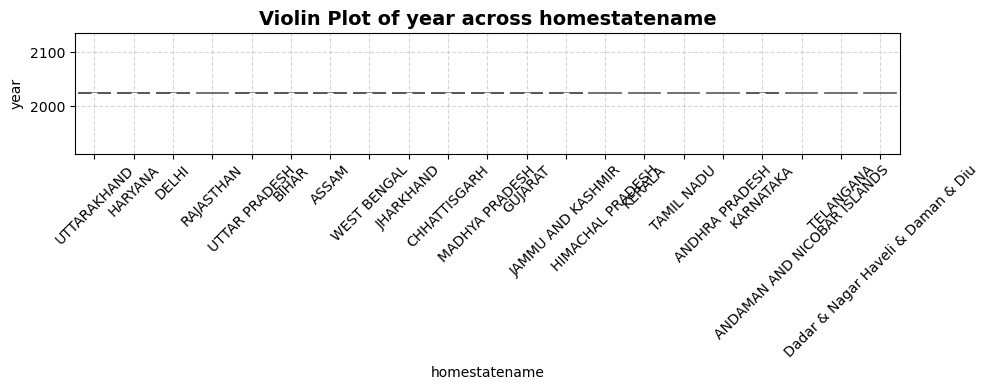

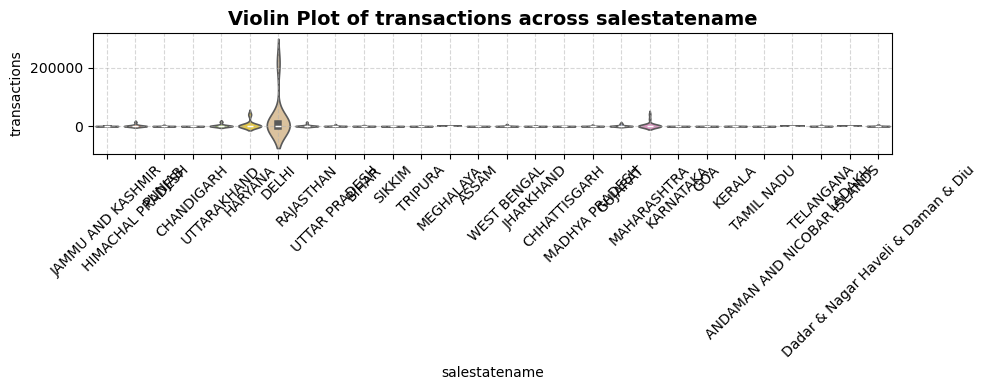

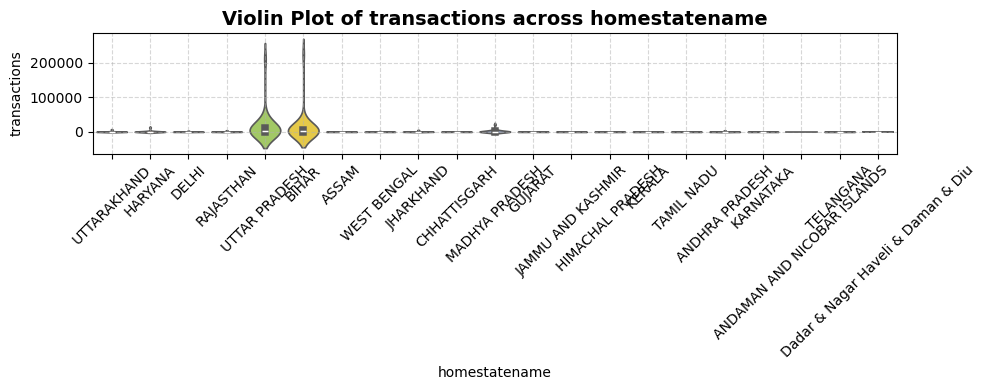

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
palette = sns.color_palette("Set2")
for num_col in numeric_cols:
    for cat_col in categorical_cols:
        plt.figure(figsize=(10, 4))
        sns.violinplot(x=cat_col, y=num_col, data=df, palette=palette, inner="box", linewidth=1.2)
        plt.title(f'Violin Plot of {num_col} across {cat_col}', fontsize=14, fontweight='bold')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()



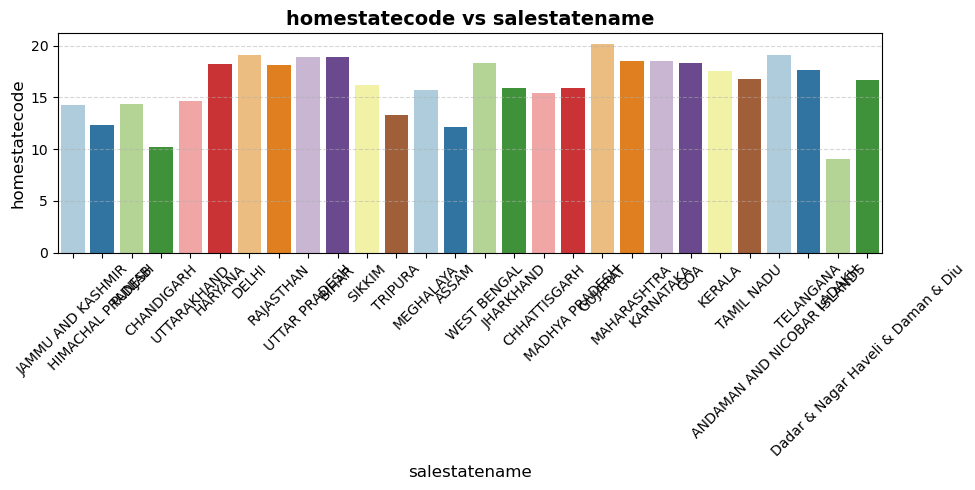

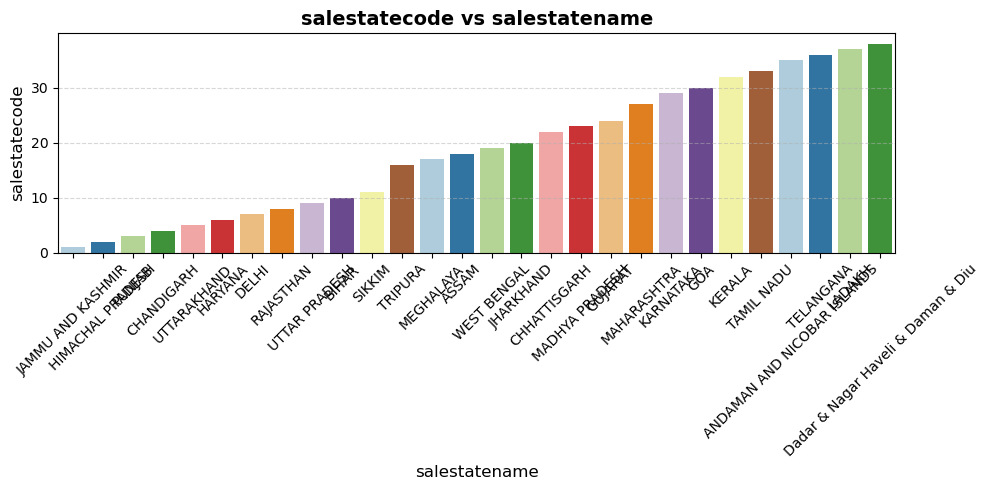

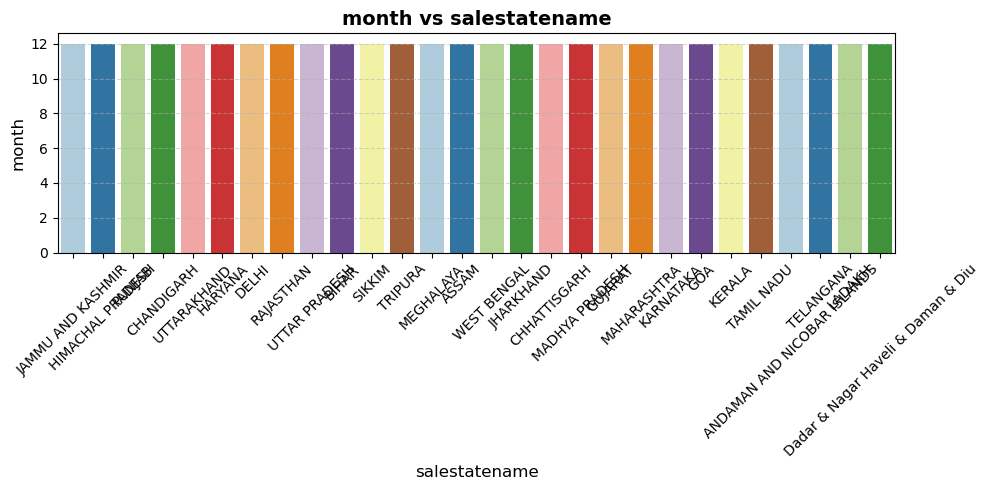

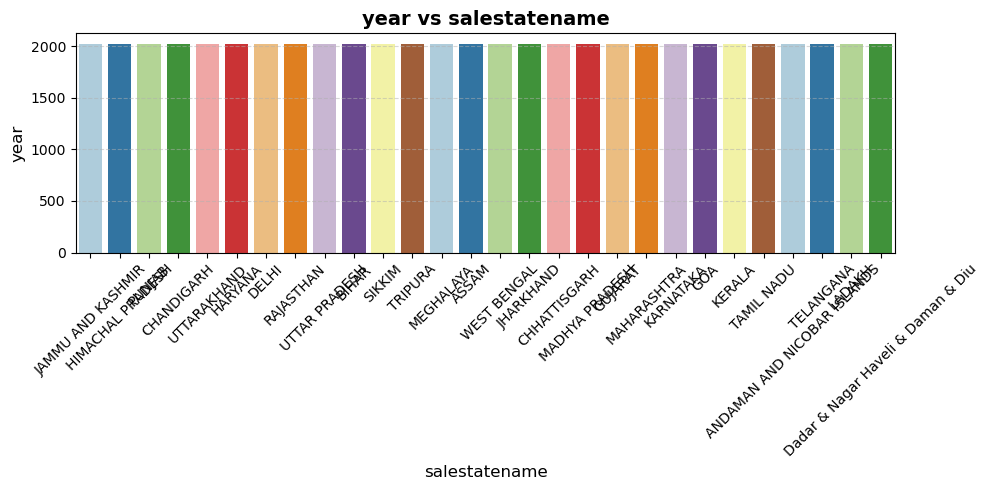

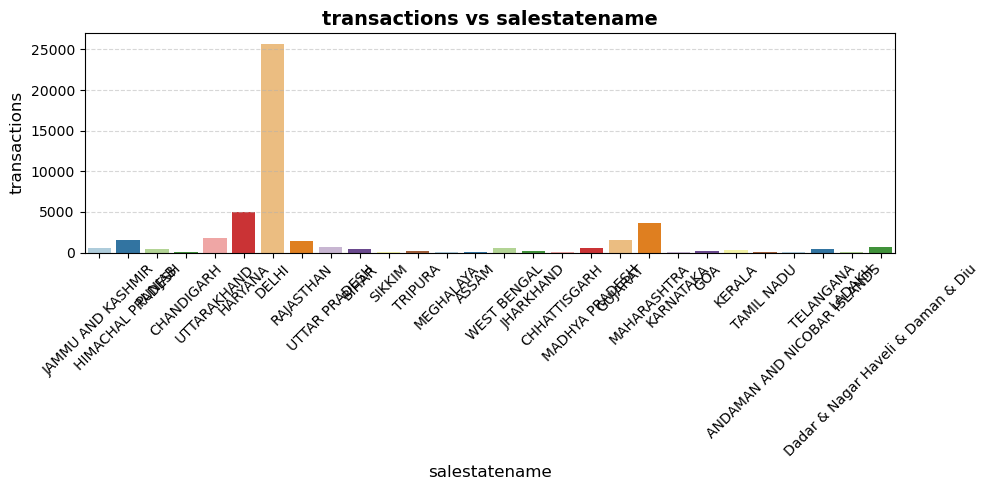

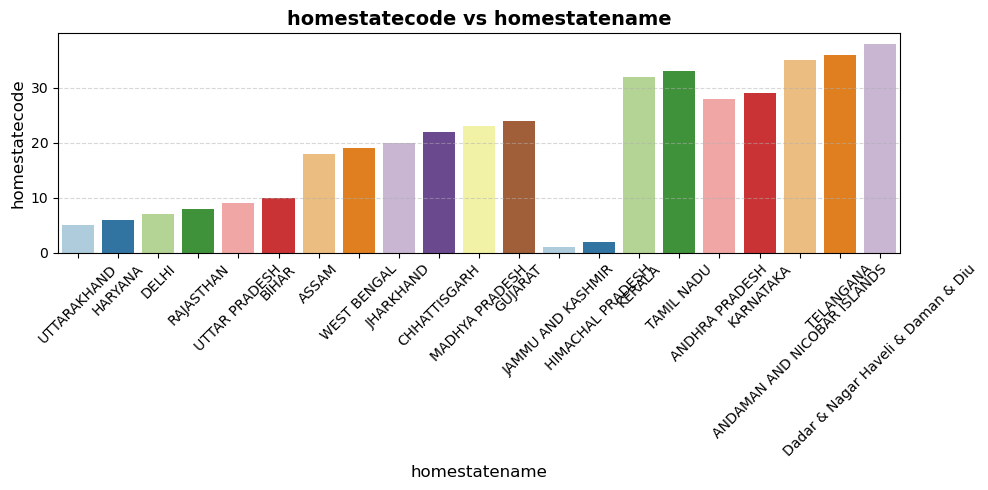

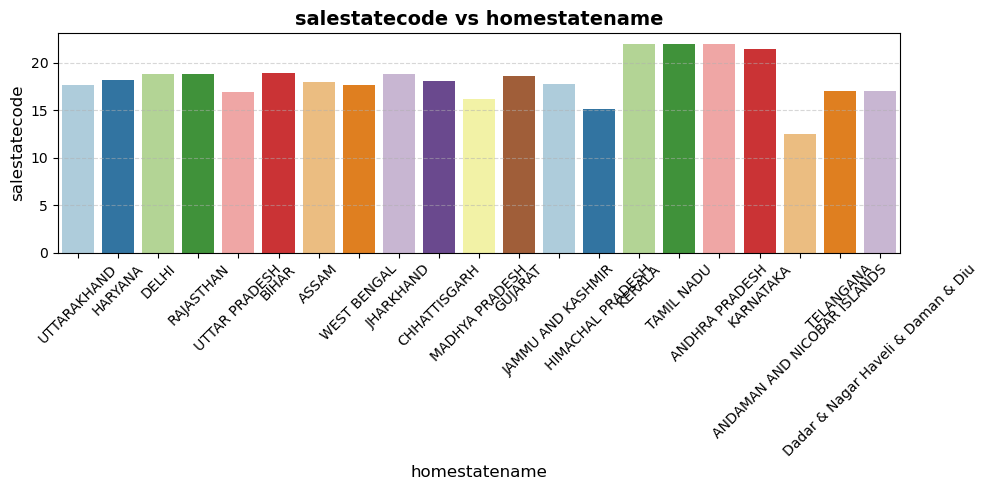

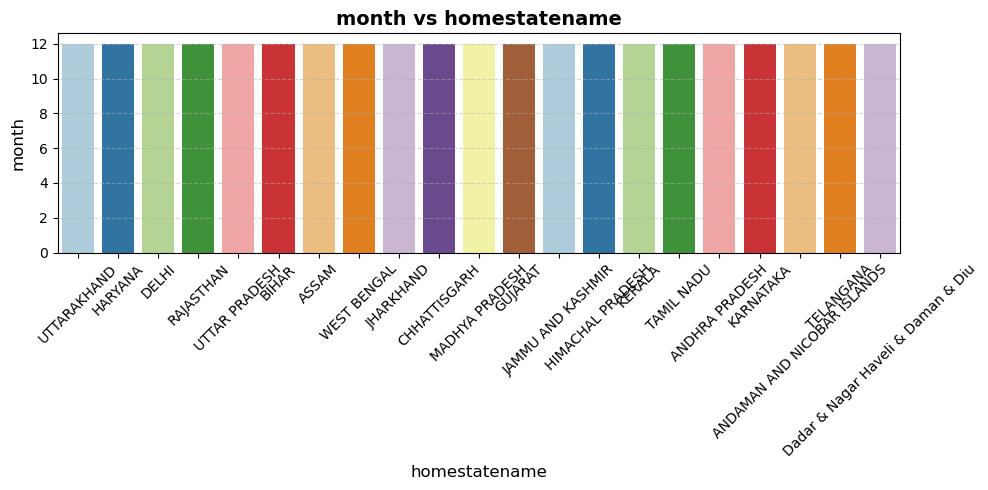

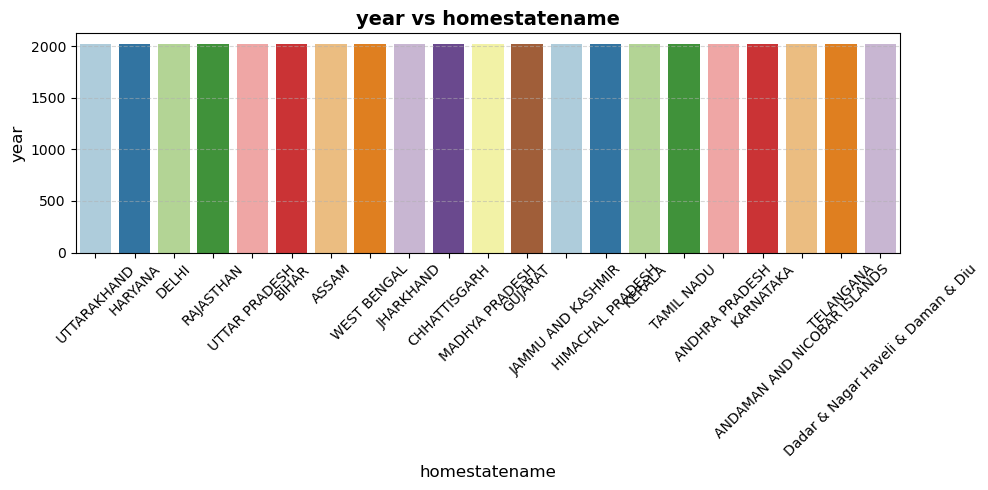

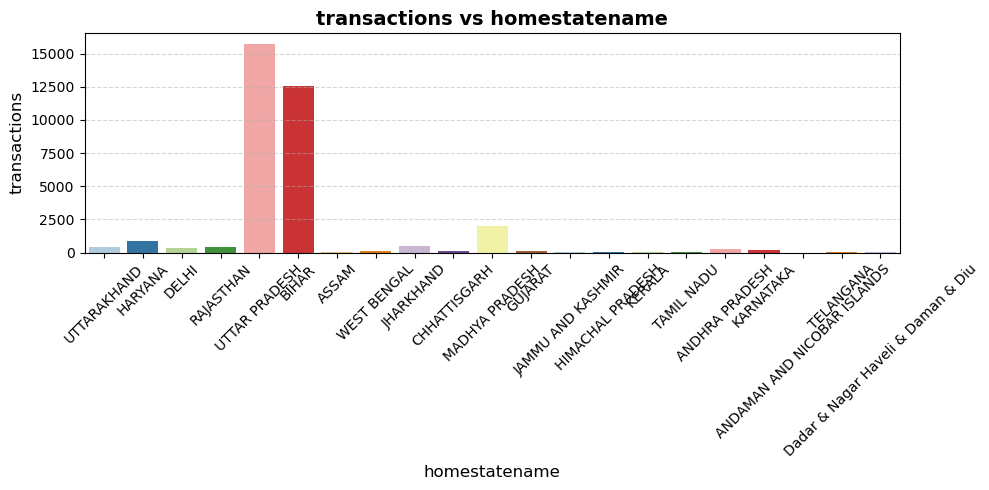

In [27]:
palette = sns.color_palette("Paired")  # You can also try 'Paired', 'Set2', 'husl'

for cat_col in categorical_cols:
    for num_col in numeric_cols:
        plt.figure(figsize=(10, 5))
        sns.barplot(data=df, x=cat_col, y=num_col, ci=None, palette=palette)
        plt.title(f'{num_col} vs {cat_col}', fontsize=14, fontweight='bold')
        plt.xlabel(cat_col, fontsize=12)
        plt.ylabel(num_col, fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(True, axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

# Chi square test

In [18]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['salestatename'], df['homestatename'])

print("Contingency Table:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("There is a significant association between salestatename and homestatename.")
else:
    print("No significant association between salestatename and homestatename.")


Contingency Table:
homestatename                       ANDAMAN AND NICOBAR ISLANDS  \
salestatename                                                     
ANDAMAN AND NICOBAR ISLANDS                                   0   
ASSAM                                                         0   
BIHAR                                                         0   
CHANDIGARH                                                    0   
CHHATTISGARH                                                  0   
DELHI                                                         0   
Dadar & Nagar Haveli & Daman & Diu                            0   
GOA                                                           0   
GUJARAT                                                       0   
HARYANA                                                       1   
HIMACHAL PRADESH                                              0   
JAMMU AND KASHMIR                                             0   
JHARKHAND                                  

# heatmap of salesstatename vs homestatename

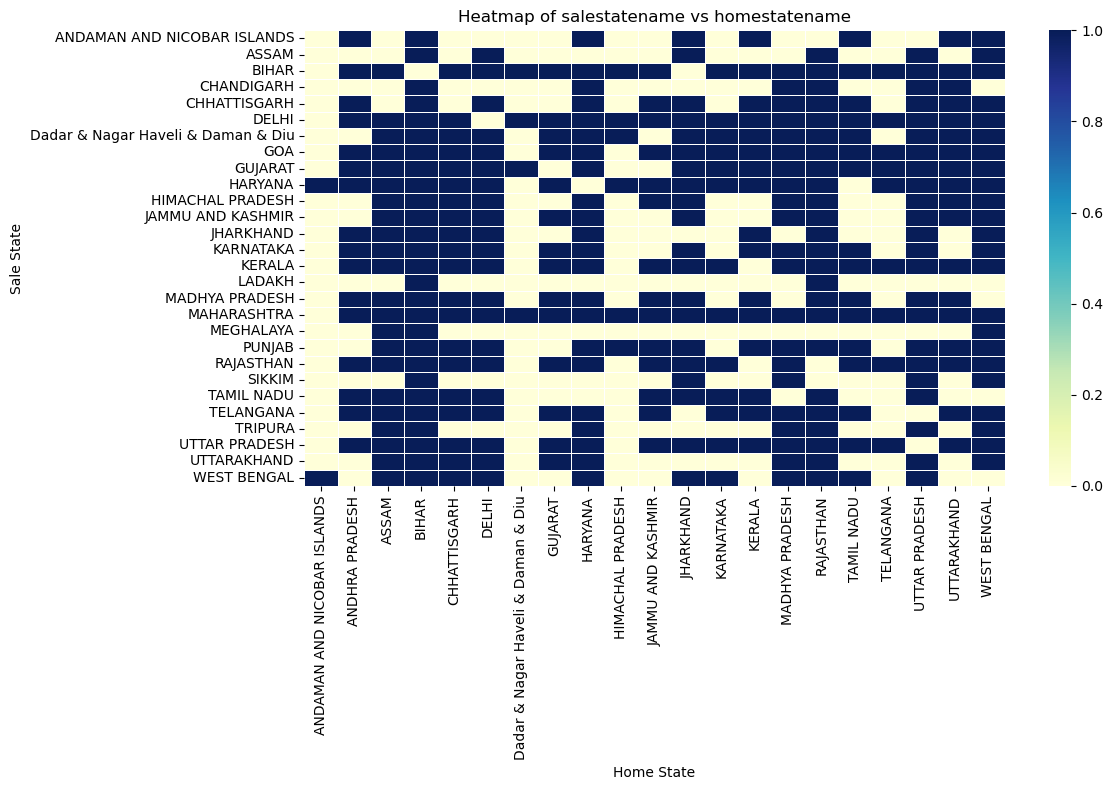

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=False, cmap="YlGnBu", linewidths=0.5)
plt.title('Heatmap of salestatename vs homestatename')
plt.xlabel('Home State')
plt.ylabel('Sale State')
plt.tight_layout()
plt.show()

# conclusion
The visualizations of the dataset gave us a clear understanding of how inter-state transactions are happening. The histograms and boxplots showed that most states have low transaction numbers, but a few states have very high values, which means only some state pairs are doing a lot of trade. The correlation heatmap showed that the numeric values don’t have a strong connection with each other. Count plots and bar graphs helped us see which states are more active in transactions—states like Uttar Pradesh, Maharashtra, and Tamil Nadu appeared more often, showing they play a big role in trade. The violin plots showed how the transaction values are spread out for different states, and the heatmap of state-wise interactions made it easy to spot which pairs of states trade the most. Overall, the visualizations helped us understand that trade is not evenly spread between all states—only a few states are handling most of the transactions, while many others are involved very little.
In addition to this, the Chi-Square test and heatmap confirmed that there is no strong relationship between the home state and sale state. This means transactions are happening independently between states without any fixed pattern or link. The visual tools made it easier to find such patterns and helped highlight important insights like which states have the highest trading activity. These findings can be useful for improving decision-making in trade planning, logistics, and government policies.
